# Neupy Tutorial

### ref: http://neupy.com/2016/11/12/mnist_classification.html#mnist-classification

In [42]:
%matplotlib inline 
import requests 
import StringIO
import zipfile
import numpy as np
import scipy as sp
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import seaborn as sns 

Load data from sklearn

In [43]:
from sklearn.datasets.mldata import fetch_mldata
import tempfile
test_data_home = tempfile.mkdtemp()
mnist = fetch_mldata('mnist-original', data_home=test_data_home)
data, target = mnist.data, mnist.target

Check imported data dimension

In [44]:
print(data.shape,target.shape)

((70000, 784), (70000,))


Preprocessing the data

In [45]:
from sklearn.preprocessing import OneHotEncoder
data = data/255.0
data = data -data.mean(axis=0)
target_scaler = OneHotEncoder()
target = target_scaler.fit_transform(target.reshape((-1, 1)))
target = target.todense()
print(data.shape,target.shape)

((70000, 784), (70000, 10))


In [46]:
pd.DataFrame(target).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from neupy import environment
from sklearn.model_selection import train_test_split

environment.reproducible()

x_train,x_test,y_train, y_test = train_test_split(data.astype(np.float32),target.astype(np.float32), \
                                                  train_size=(6. / 7))

Check data format

In [63]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

((60000, 784), (60000, 10))
((10000, 784), (10000, 10))


 For theano we need to add additional configuration that will explain Theano that we are going to use 32bit float numbers.

In [64]:
import theano
theano.config.floatX = 'float32'

Start training the network according to tutorial config.

In [69]:
from neupy import algorithms, layers
network = algorithms.Momentum([layers.Input(784),
                               layers.Relu(500),
                               layers.Relu(300),
                               layers.Softmax(10)],error='categorical_crossentropy',step = 0.01,verbose=True,
                              shuffle_data=True,momentum=0.99,nesterov = True)


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 128
[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = categorical_crossentropy
[OPTION] addons = None
[OPTION] momentum = 0.99
[OPTION] nesterov = True

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.19 seconds


Check the architecture

In [70]:
network.architecture()


Network's architecture

-----------------------------------------------
| # | Input shape | Layer Type | Output shape |
-----------------------------------------------
| 1 | 784         | Input      | 784          |
| 2 | 784         | Relu       | 500          |
| 3 | 500         | Relu       | 300          |
| 4 | 300         | Softmax    | 10           |
-----------------------------------------------



Start training

In [78]:
network.train(x_train,y_train,x_test, y_test,epochs=20)


Start training

[TRAINING DATA] shapes: (60000, 784)
[TEST DATA] shapes: (10000, 784)
[TRAINING] Total epochs: 20

------------------------------------------------
| Epoch # | Train err | Valid err | Time       |
------------------------------------------------
| 1       | 0.2721    | 0.1076    | 4.7 sec    |                                       
| 2       | 0.06845   | 0.08498   | 4.5 sec    |                                       
| 3       | 0.0365    | 0.08869   | 5.1 sec    |                                       
| 4       | 0.02262   | 0.08599   | 4.1 sec    |                                       
| 5       | 0.01384   | 0.09251   | 4.3 sec    |                                       
| 6       | 0.008225  | 0.08704   | 4.2 sec    |                                       
| 7       | 0.005196  | 0.08705   | 4.2 sec    |                                       
| 8       | 0.002663  | 0.08489   | 4.2 sec    |                                       
| 9       | 0.001428  | 0.08401  

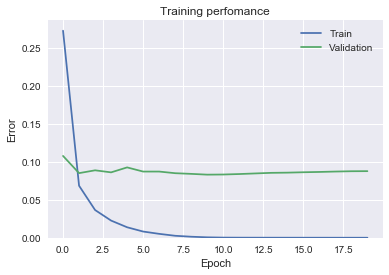

In [79]:
from neupy import plots
plots.error_plot(network)

In [ ]:
%%bash
git add Neupy_Tutorial.ipynb
git commit -m 'Add training code and error plot code'
git push